### Ejercicio 5
Escribir un programa que cree un proceso hijo con las siguientes características:
- El programa recibirá dos argumentos en la forma: 
> ./ejercicio5 <segundos_padre> <segundos_hijo>
- El hijo creará su propia sesión, imprimirá sus identificadores (como en el Ejercicio 2), esperará <segundos hijo> (segundo argumento) con la llamada sleep(3); y terminará.
- El padre imprimirá sus identificadores (Ejercicio 2), esperará <segundos padre> (primer argumento) con la llamada sleep; y terminará.

In [ ]:
int main() {
    pid_t pid;

    pid = fork();

    switch (pid) {
    case -1:
        perror("fork");
        exit(1);
    case 0:
        sleep(argv[2]);
        printf("Hijo: %i (padre: %i)\n", getpid(), getppid());
        break;
    default:
        sleep(argv[1]);
        printf("Padre: %i (hijo: %i)\n", getpid(), pid);
        break;
    }

    return 0;
}


### Ejercicio 9:
Escribir un programa que ejecute otro programa (ejecutable y argumentos) que se pasará como argumento. El programa creará un proceso hijo que ejecutará el programa dado en el argumento con la función execvp(3). El proceso padre esperará que termine el hijo e imprimirá su código de salida. Ejemplos de ejecución:


In [ ]:
// Queremos ejecutar ./9 ls -l -a

int main() {
    pid_t pid;

    pid = fork();

    switch (pid) {
    case -1: // Error
        perror("fork");
        exit(1);
    case 0: // Hijo
        printf("Hijo: %i (padre: %i)\n", getpid(), getppid());
        //  &argv[1] direccion del primer argumento (ls).
        execvp(argv[1], &argv[1]);
        break;
    default: // Padre
        printf("Padre: %i (hijo: %i)\n", getpid(), pid);
        break;
    }

    return 0;
}

### Ejercicio 11 y 12
Escribir un programa que genere un fichero con 5 procesos concurrentes con la siguiente estructura:

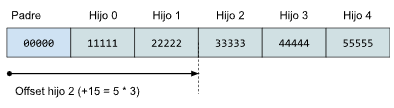

El proceso padre creará el fichero de salida output.txt y escribirá el primer segmento de 5 ceros (00000). A continuación creará 5 hijos y esperará a que termine cada uno mostrando el PID y número de hijo. Cada hijo realiza las siguientes acciones:
- Abrirá el archivo y desplazará el puntero de escritura el offset correspondiente.
- Escribirá la secuencia correspondiente (“11111”, “22222”...). Esta parte puede implementarse de dos formas:
    - Creando una cadena con la secuencia correspondiente, con sprintf(3); y escribiendo la cadena en el archivo.
    - Definiendo un array con cada posición inicializada al carácter correspondiente al hijo (char c = ‘0’ + index) ; y escribiendo el array en el archivo


In [ ]:
#define NUM 5

void imprimir_indice(int fd, int indice){
    char buffer[NuM];
    for(int i=0; i<NUM; i++){
        buffer[i] = '0' + indice; // Desplazamiento del puntero
    }

    write(fd, buffer, NUM*sizeof(char));

    /*
    char buffer[NUM+1];
    
    
    */
}

int main(int argc, char *argv[]) {
    pid_t pid;
    int rc;

    int fd = open("archivo.txt", 
        O_WRONLY | O_CREATE | O_TRUNC, 
        0660);
    
    imprimir_indice(fd, 0); // Padre

    close(fd);

    for(int indice = 1; indice <= 6; indice++){
        pid_t pid = fork();

        // Solo el padre crea nuevos procesos
        if (pid != 0) {
            continue;
        }
        // El padre no entra aqui
        // cada hijo tiene su archivo
        fd = open("archivo.txt", O_WRONLY);
        // Como hijo, nos posicionamos en el lugar correcto
        lseek(fd, indice * NUM, SEEK_SET);
        srandom(indice);
        int sec = random() % 2;
        sleep(sec);
        imprimir_indice(fd, indice);

        close(fd);
        return 0;
    }

    // Esperamos a los hijos
    for(int i=0; i<=5; i++){
        int s;
        int rc = waitpid(0, &s, 0);
        // Obtener el PID del hijo que ha terminado
        if (WIFEXITED(s)) {
            printf("Hijo [%i]finalizado con codigo %d\n", rc, WEXITSTATUS(s));
        }
    }
    return 0;
}

#### Ejercicio 16. 
En un sistema monoprocesador se ejecutan los procesos mostrados a continuación (todos los tiempos son en segundos):

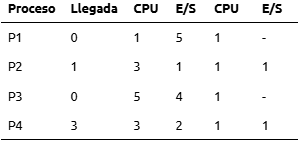

Determina los tiempos de retorno (turnaround) y de espera para cada proceso y la productividad (throughput) del sistema para las siguientes políticas de planificación:
- First Come First Serve (FCFS)
- Shortest Job First (SJF) (TODO)
- Round Robin (RR) con cuanto de 3s
- Round Robin (RR) con cuanto de 1s (TODO)

- First Come First Serve (FCFS)

| Tiempo | P1 | P2 | P3 | P4 | Cola de preparados |
|---|---|---|---|---|---|
| t = 0 | W (wait) |  | R(running), hasta 5 |  | ~~P3~~, P1 |
| t = 1 | W (wait) | W (wait) | R(running) |  | P1, P2 |
| t = 3 | W | W | R | W | P1, P2, P4 |
| t = 5 | R, 6 | W | E/S (Entrada/Salida), 9 | W | ~~P1~~, P2, P4 |
| t = 6 | E/S, 11 | R, 9 | E/S | W | ~~P2~~, P4 |
| t = 9 | E/S | E/S, 10 | W | R, 12 | ~~P4~~, P3 |
| t = 10 | E/S | W | W | R | P3, P2 |
| t = 11 | W | W | W | R | P3, P2, P1 |
| t = 12 | W | W | R, 13 | E/S, 14 | ~~P3~~, P2, P1 |
| t = 13 | W | R, 14 | - (Ha terminado) | E/S | ~~P2~~, P1 |
| t = 14 | R, 15 | E/S, 15 | - | W | ~~P1~~, P4 |
| t = 15 | - | - | - | R, 16 | ~~P4~~ |
| t = 16 | - | - | - | E/S 17 |  |
| t = 17 | - | - | - | - |  |



Proceso P1:

- Tw (Tiempo esperando) = (T5-T0) + ( T14-T11) = 8 unidades de tiempo esperando.
- Tta (Tiempo de turn around) = T15 - T0 = 15 unidades de tiempo

Proceso P2:
- Tw =  unidades de tiempo esperando.
- Tta = T15 - T1 = 14 unidades de tiempo

Proceso P3:
- Tw = (T6-T1) + ( T13-T10) = 8 unidades de tiempo esperando.
- Tta = T12 - T0 = 12 unidades de tiempo

Proceso P4:
- Tw =  unidades de tiempo esperando.
- Tta = T16 - T3 = 13 unidades de tiempo

Productividad = nº trabajos / total de unidad de tiempo => 4/17 = 0.2

- Round Robin (RR) con cuanto de 3s

| Tiempo | P1 | P2 | P3 | P4 | Cola de preparados |
|---|---|---|---|---|---|
| t = 0 | R, 1 |  | W |  | ~~P1~~, P3 |
| t = 1 | E/S, 6 | W | R, (5> cuanto) => 3 (faltan 2) |  | ~~P3~~, P2 |
| t = 3 | E/S | W | R | W | P2, P4 |
| t = 4 | E/S | R, 7 | W | W | ~~P2~~, P4, P3 |
| t = 6 | W | R | W | W | P4, P3, P1 |
| t = 7 | W | E/S, 8 | W | R, 10 | ~~P4~~, P3, P1 |
| t = 8 | W | W | W | R | P3, P1, P2 |
| t = 10 | W | W | R, 12 | E/S, 12 | ~~P3~~, P1, P2 |
| t = 12 | R, 13 | W | E/S, 16 | W | ~~P1~~, P2, P4 |
| t = 13 | - | R, 14 | E/S | W | ~~P2~~, P4 |
| t = 14 | - | E/S, 15 | E/S | R, 15 | ~~P4~~ |
| t = 15 | - | - | E/S | E/S, 16 |  |
| t = 16 | - | - | R, 17 | - | ~~P3~~ |
| t = 16 | - | - | - | - |  |

Proceso P1:

- Tw  =  unidades de tiempo esperando.
- Tta  =  unidades de tiempo

Proceso P2:
- Tw =  unidades de tiempo esperando.
- Tta = 4 unidades de tiempo

Proceso P3:
- Tw = (T6-T1) + ( T13-T10) = 8 unidades de tiempo esperando.
- Tta = T12 - T0 = 12 unidades de tiempo

Proceso P4:
- Tw =  unidades de tiempo esperando.
- Tta = T16 - T3 = 13 unidades de tiempo

Productividad = nº trabajos / total de unidad de tiempo => 4/17 = 0.2

#### Ejercicio 17. 
Considere un sistema monoprocesador con una política de planificación de procesos de 3 niveles con realimentación. Los procesos que agotan el cuanto bajan de nivel y los que ceden la CPU antes de agotarlo son promocionados. Además cuando un proceso acaba una operación de E/S se añade a la cola de espera de mayor prioridad. Cada nivel usa una política round robin cuyos cuantos de tiempo son 2, 4 y 8, respectivamente para cada nivel.
Al principio hay 3 procesos en la cola del nivel 1 (máxima prioridad) y el resto de colas están vacías. Los procesos tiene el siguiente patrón de ejecución que se repite indefinidamente:

| Proceso | CPU | E/S |
|---|---|---|
| P1 | 3 | 5 |
| P2 | 8 | 5 |
| P3 | 5 | 5 |

Dibuja un diagrama de gantt para la ejecución para los primeros 30s que muestre además el estado de las colas de espera de cada nivel.  Calcula los tiempos de espera de cada proceso.


Los procesos menos nice(Majillos) se usan mas que los majos.

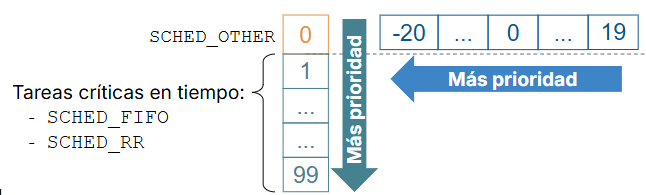